<a href="https://colab.research.google.com/github/pathipakapujitha/Major-Project/blob/main/Densenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define image size
IMAGE_SIZE = [256, 256]

# Define paths for training and validation data
train_path = '/content/drive/MyDrive/3code/Train'
valid_path = '/content/drive/MyDrive/3code/Test'

In [ ]:
# Load DenseNet model with pre-trained weights
densenet = DenseNet121(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# Set all layers of DenseNet to non-trainable
for layer in densenet.layers:
    layer.trainable = False

In [ ]:
# Get the number of output classes
folders = glob('/content/drive/MyDrive/3code/Train/*')

In [ ]:
# Flatten the output of DenseNet
x = Flatten()(densenet.output)

In [ ]:
# Add a dense layer with softmax activation for prediction
prediction = Dense(len(folders), activation='softmax')(x)


In [ ]:
# Create a model object
model = Model(inputs=densenet.input, outputs=prediction)

In [ ]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Load the training and testing data
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size = (256, 256),
    batch_size = 32,
    class_mode = 'categorical'
)

test_set = test_datagen.flow_from_directory(
    valid_path,
    target_size = (256, 256),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1500 images belonging to 3 classes.
Found 446 images belonging to 3 classes.


In [ ]:
# Fit the model
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)


Epoch 1/10
47/47 [==============================] - 59s 1s/step - loss: 1.7997 - accuracy: 0.8093 - val_loss: 0.3664 - val_accuracy: 0.9484
Epoch 2/10
47/47 [==============================] - 45s 957ms/step - loss: 0.5851 - accuracy: 0.9267 - val_loss: 0.3631 - val_accuracy: 0.9395
Epoch 3/10
47/47 [==============================] - 47s 992ms/step - loss: 0.3160 - accuracy: 0.9480 - val_loss: 0.2155 - val_accuracy: 0.9574
Epoch 4/10
47/47 [==============================] - 46s 980ms/step - loss: 0.3281 - accuracy: 0.9440 - val_loss: 0.2018 - val_accuracy: 0.9529
Epoch 5/10
47/47 [==============================] - 46s 987ms/step - loss: 0.2621 - accuracy: 0.9567 - val_loss: 0.6829 - val_accuracy: 0.9193
Epoch 6/10
47/47 [==============================] - 45s 965ms/step - loss: 0.4694 - accuracy: 0.9333 - val_loss: 0.8418 - val_accuracy: 0.9126
Epoch 7/10
47/47 [==============================] - 45s 955ms/step - loss: 0.4036 - accuracy: 0.9513 - val_loss: 1.1648 - val_accuracy: 0.9103
Ep

In [ ]:
# Save the model
model.save('/content/drive/MyDrive/3code/model51_densenet121.h5')

In [ ]:
# Load the model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input, DenseNet121
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Load the DenseNet model
model = load_model('/content/drive/MyDrive/3code/model51_densenet121.h5')

1/1 [==============================] - 2s 2s/step
[[1.0000000e+00 3.1182085e-26 0.0000000e+00]]
0


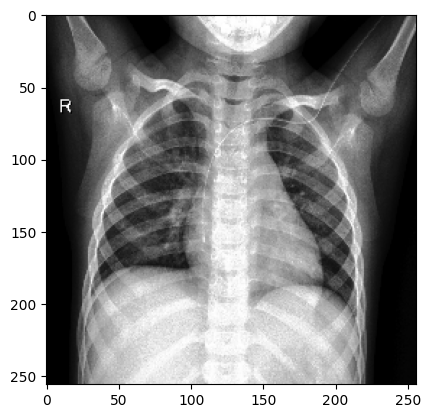

In [ ]:
# Load and preprocess the image
img = image.load_img('/content/drive/MyDrive/3code/Test/Normal/1.jpg', target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Predict the class probabilities
classes = model.predict(img_array)

# Print the predicted classes
print(classes)

# Get the index of the predicted class with the highest probability
index1 = np.argmax(classes[0])
print(index1)

# Plot the image
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 28ms/step
[[1.14734196e-14 1.00000000e+00 2.04761501e-28]]
1


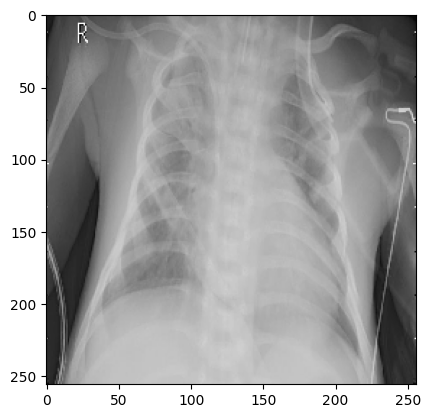

In [ ]:
# Load and preprocess the image
img = image.load_img('/content/drive/MyDrive/3code/Test/Pneumonia/104.jpg', target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Predict the class probabilities
classes = model.predict(img_array)

# Print the predicted classes
print(classes)

# Get the index of the predicted class with the highest probability
index1 = np.argmax(classes[0])
print(index1)

# Plot the image
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 28ms/step
[[1.8967113e-30 4.8309259e-09 1.0000000e+00]]
2


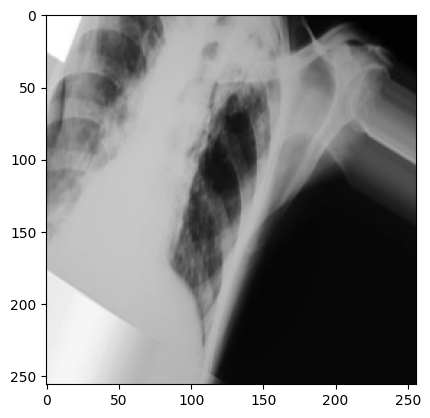

In [ ]:
# Load and preprocess the image
img = image.load_img('/content/drive/MyDrive/3code/Test/Tuberculosis/1.jpg', target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Predict the class probabilities
classes = model.predict(img_array)

# Print the predicted classes
print(classes)

# Get the index of the predicted class with the highest probability
index1 = np.argmax(classes[0])
print(index1)

# Plot the image
plt.imshow(img)
plt.show()

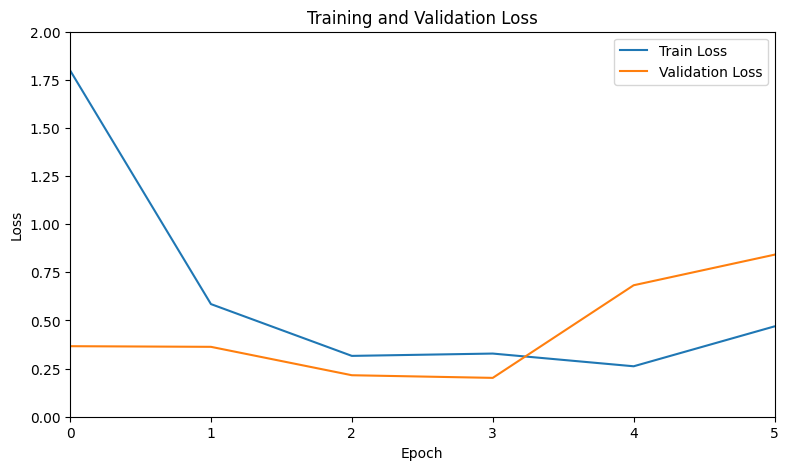

In [ ]:
# Display training and validation loss
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(r.history['loss'], label="Train Loss")
plt.plot(r.history['val_loss'], label="Validation Loss")
plt.xlim(0, 5)
plt.ylim(0.0, 2.0)
plt.legend()
plt.show()

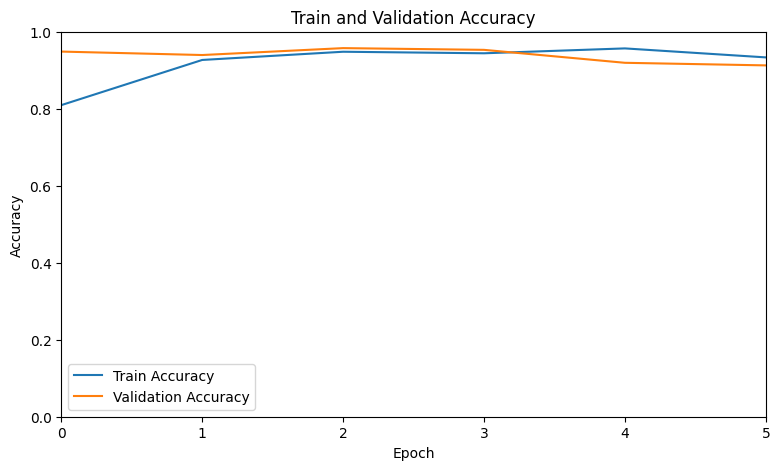

In [ ]:
# Display training and validation accuracy
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(r.history['accuracy'], label="Train Accuracy")
plt.plot(r.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 5)
plt.ylim(0, 1.0)
plt.legend()
plt.show()

In [ ]:
training_accuracy=r.history['accuracy'][-1]
testing_accuracy=r.history['val_accuracy'][-1]
print("Total Training Accuracy:", training_accuracy)
print("Total Testing Accuracy:", testing_accuracy)

Total Training Accuracy: 0.9739999771118164
Total Testing Accuracy: 0.9372197389602661


In [ ]:
from tensorflow.keras.models import load_model
model=load_model('/content/drive/MyDrive/3code/model51_densenet121.h5')

In [ ]:
# Importing all important libraries
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import seaborn as sns           # for working with maps
import torch                    # Pytorch module
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
from torchsummary import summary              # for getting the summary of our model
import tensorflow as ts
from  tensorflow import keras
import itertools
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve

%matplotlib inline

In [ ]:
train_data="/content/drive/MyDrive/3code/Train"
# Validation Data
valid_data="/content/drive/MyDrive/3code/Test"

In [ ]:
# Create a rescaling layer in a Keras model
rescale=keras.layers.Rescaling(scale=1.0/255)

In [ ]:
# Create TensorFlow tf.data.Dataset objects from image directories for training and validation data in Keras
# Images are loaded with the specified image size of (256, 256), and the function image_dataset_from_directory assigns labels based on subdirectory names
training_data =keras.utils.image_dataset_from_directory(train_data , image_size=(256, 256))
validation_data = keras.utils.image_dataset_from_directory(valid_data, image_size=(256, 256))

Found 1500 files belonging to 3 classes.
Found 446 files belonging to 3 classes.


In [ ]:
validation_data = keras.utils.image_dataset_from_directory(valid_data, image_size=(256, 256))

Found 446 files belonging to 3 classes.


In [ ]:
valid_gen  = validation_data.map(lambda image,label:(rescale(image),label))

In [ ]:
# Obtain the labels and predictions for the validation data.
labels = []
predictions = []
for x,y in valid_gen:
    labels.append(list(y.numpy()))
    predictions.append(ts.argmax(model.predict(x),1).numpy())

1/1 [==============================] - 2s 2s/step


In [ ]:
# Flatten the nested lists of predictions and labels
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

<Figure size 400x400 with 0 Axes>

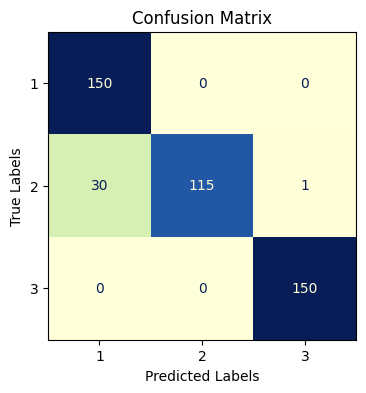

In [ ]:
# Plot a confusion matrix based on the true labels and predicted labels
plt.figure(figsize= (4,4))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(1,4)))
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score

# Calculate F1 score
f1 = f1_score(labels, predictions, average='weighted') * 100

# Calculate recall score
recall = recall_score(labels, predictions, average='weighted') * 100

# Calculate precision score
precision = precision_score(labels, predictions, average='weighted') * 100

print("F1 Score: {:.3f} %".format(f1))
print("Recall Score: {:.3f} %".format(recall))
print("Precision Score: {:.3f} %".format(precision))

F1 Score: 92.943 %
Recall Score: 93.049 %
Precision Score: 94.172 %
